# for nheptane


In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pylab as plt
import matplotlib.gridspec as gsp
from  matplotlib.ticker import MultipleLocator
import matplotlib as mpl
%matplotlib inline
#%config InlineBackend.figure_formats = ["retina"]

import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis


#from scipy import optimize as opt
from importlib import reload
from collections import OrderedDict
#import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings(action='error')

Eneter the ignition and extinction temperatures that you got for chemiluminescence file (at its end.).

In [26]:
nan = np.nan
ext_1= np.array([924.2689583237132,
 936.3309184210532,
 937.0743628888033,
 990.2592668419476,
 982.6374927688876,
 984.6957331337051,
 979.8518220955327,
 979.260704485565,
 1122.1847062484078,
 1192.9216361442648])
ign_1= np.array([1289.8002187954335,
 1333.2144237782625,
 1333.793552573897,
 1333.0853075434766,
 1330.8097168242325,
 1296.4859496734348,
 1329.6024138910802,
 1329.9063653614128,
 1222.7900938123587,
 1280.2652380520346])
ign_ethane = ign_1
ext_ethane = ext_1
print(ext_ethane)
print(ign_ethane)

[ 924.26895832  936.33091842  937.07436289  990.25926684  982.63749277
  984.69573313  979.8518221   979.26070449 1122.18470625 1192.92163614]
[1289.8002188  1333.21442378 1333.79355257 1333.08530754 1330.80971682
 1296.48594967 1329.60241389 1329.90636536 1222.79009381 1280.26523805]


In [27]:
ign_d= np.array([ 1324.02795, 
1324.02795, 
1321.355707, 
1335.95674, 
1350.247905, 
1350.247905, 
1350.247905, 
1350.247905, 
1324.02795, 
1351.175843]) 
ext_d= np.array([ 1133.267171, 
1173.977495, 
1182.880922, 
1222.007383, 
1238.96518, 
1238.96518, 
1246.952937, 
1258.269966, 
1261.877717, 
1292.126534])
ign_ethane10 = ign_10
ext_ethane10 = ext_10
print(ext_ethane10)
print(ign_ethane10)

NameError: name 'ign_10' is not defined

In [28]:
labels = {'xlabel':r'$v$ (cm/s)',
          'ylabel':r'Temperature $T$ (K)',
          'title':'',
          'legend':r'$\mathrm{CH^\star}$ (430 nm)',
          'legend2':r'v = 40 cm/s'}
limits = {'ylim':(900,1325,),
          'yticks':range(900,1400,50),
          'xlim':(0,90,),
          'xticks':range(0,100,10),
          'legend':'upper right'}
limits2 = {'ylim':(600,1325,),
          'yticks':range(600,1400,100),
          'xlim':(0,170,),
          'xticks':range(0,170,10),
          'legend':'upper right'}
limits3 = {'ylim':(950,1300,),
          'yticks':range(950,1300,10),
          'xlim':(0,1),
          'xticks':range(0,1,20),
          'legend':'lower right'}
#runs = np.unique(np.array(['nheptane']))
#runs = runs[np.argsort([ int(r[3:]) for r in runs ])][-1::-1]
#print(runs)
mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})
#col = mpl.rcParams['axes.color_cycle'] ## deprecated
col = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
leg_fsize = 10

lw = 1.7
col = ['blue','red']
#dashes = [(10., 0.1),(8.0, 2.0),(7.0, 2.0, 2.0, 2.0),(2.0, 2.0)]
dashes = [(8.0, 2.0),(10., 0.1),(7.0, 2.0, 2.0, 2.0),(4.0, 1.0)]
mv = MultipleLocator(25)
mh = MultipleLocator(5)

In [29]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In vel1 list, enter the velocity steps that you got for the fuel.

In [30]:
ht= 2
vel_1 = np.array([3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  12.5,
  15.0])
vel1 = vel_1
vel3 =np.array([2.5, 5.0,7.5,10.0,20.0,30.0,40.0,50.0,55.0,60.0,65.0,70.0,75,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0])
vel4 =np.array([2.5, 5.0,7.5,10.0,20.0,30.0,40.0,50.0,55.0,60.0,65.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0])
phi = np.array([0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00])

In [31]:
vel_2=np.array([3, 
4, 
5, 
6, 
7, 
8, 
9, 
10, 
12.5, 
15]) 

This section is for ploting the fuel ignition and extinction temperatuer vs. Phi for various fuels.

ValueError: x and y must have same first dimension, but have shapes (8,) and (10,)

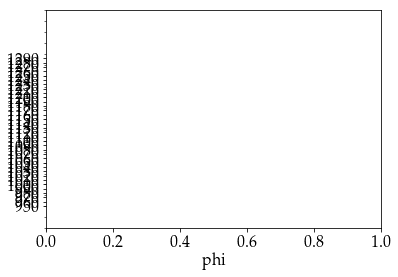

In [32]:

fig,ax = plt.subplots(1,1)

#title = ['Ignition and Extinction temperatures of alkylate']
x=0
ax.set_facecolor('none')
ax.set_ylim(900, 1400)
ax.set_xlabel('phi') 
#ax.set_title(title[x],y=1.02)
#ax.set_xticks([0.2,0.3,0.4])
ax.set_yticks(limits3['yticks'])
ax.yaxis.set_minor_locator(mv)
ax.xaxis.set_minor_locator(mh)  
ax.plot(phi,ign_ethane,
                   linewidth=lw,linestyle=(0,(5,1,1,1,1,1)),
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/alkylate')

ax.plot(phi,ext_ethane,
                   linewidth=lw,linestyle=(0,(10,4)),
                   color = 'b',
                   marker='^',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/alkylate')
ax.set_ylabel('Temperature (K)')  
leg = ax.legend()
leg.draw_frame(False)
leg.draw_frame(False)
plt.setp(leg.get_title(),fontsize=leg_fsize)
#plt.title(figure_title, )
# default formatting for 8x5 plots
# update matplotlib style
plt.style.use('manuscript')
#fig.savefig('manuscript.pdf')

This section plot the diagram for T+/T- at all the velocity steps that you entered in vel1 list.

C:\Users\Navid\Anaconda3\lib\site-packages\matplotlib\textpath.py:324: UserWarning: The glyph (52) of font (C:/Users/Navid/AppData/Local/Programs/MiKTeX 2.9/fonts/type1/urw/palatino/uplr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
C:\Users\Navid\Anaconda3\lib\site-packages\matplotlib\textpath.py:324: UserWarning: The glyph (54) of font (C:/Users/Navid/AppData/Local/Programs/MiKTeX 2.9/fonts/type1/urw/palatino/uplr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
C:\Users\Navid\Anaconda3\lib\site-packages\matplotlib\textpath.py:324: UserWarning: The glyph (56) of font (C:/Users/Navid/AppData/Local/Programs/MiKTeX 2.9/fonts/type1/urw/palatino/uplr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
C:\Users\Navid\Anaconda3\lib\site-packages\matplotlib\textpath.py:324: UserWarning: The glyph (49) of font (C:/Users/Navid/AppData/Local

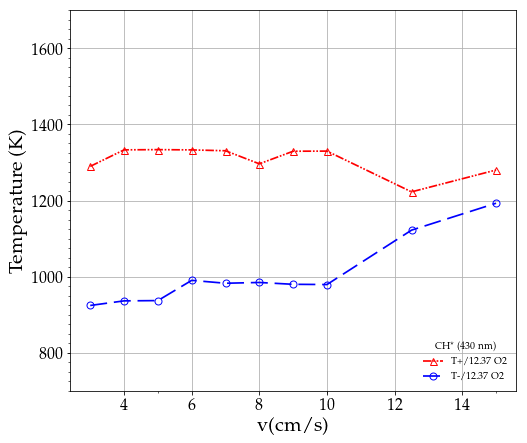

In [33]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,7)
x=0
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['savefig.dpi'] = 500
ax.set_facecolor('none')
ax.set_ylim(700, 1700)
ax.set_xlabel('v(cm/s)', fontsize = 20) 
#ax.set_title(title[x], fontsize = 21)
#ax.set_xticks(limits3['xticks'])
#ax.set_yticks(limits3['yticks'])
ax.yaxis.set_minor_locator(mv)
ax.xaxis.set_minor_locator(mh)
ax.plot(vel1,ign_ethane,
                   linewidth=lw,linestyle=(0,(5,1,1,1,1,1)),
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37 O2')

ax.plot(vel1,ext_ethane,
                   linewidth=lw,linestyle=(0,(10,4)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37 O2')
#
ax.set_ylabel('Temperature (K)', fontsize = 20) 
ax.yaxis.set_minor_locator(mv)
ax.xaxis.set_minor_locator(mh)
leg = ax.legend()
leg.draw_frame(False)
leg.draw_frame(False)
leg = ax.legend(loc=limits3['legend'],prop={'size':leg_fsize},
                   title=labels['legend'])
leg.draw_frame(False)
leg.draw_frame(False)
plt.grid(b=None, which='major', axis='both')
plt.setp(leg.get_title(),fontsize=leg_fsize)
plt.savefig("graph.svg")

In [ ]:
'%%Energy Losses=%.2f'%8

In [ ]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6

fig,ax = plt.subplots(1,4)
fig.set_size_inches(16.,5,forward= False )
fig.subplots_adjust(hspace=0,wspace=0,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
title = ['Ethane 130 psig 12.37O2','Ethane 87 psig 15.49O2']
#for r in range(R):
#    ax[r].set_xlim(limits['xlim'])
#    ax[r].set_xticks(limits['xticks'])
#    ax[r].set_xlabel(labels['xlabel'])
#    ax[r].set_yticks(limits['yticks'])
#    ax[r].set_ylim(limits['ylim'])
#    ax[r].yaxis.set_minor_locator(mv)
#    ax[r].xaxis.set_minor_locator(mh)
for x in range(2):
    ax[x].set_ylim(700, 1300)
    ax[x].set_xlabel('v (cm/s)') 
    ax[x].set_title(title[x])
    ax[x].set_xticks(limits['xticks'])
    ax[x].set_yticks(limits['yticks'])
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(3):
    ax[x+1].set_yticklabels([])
       
ax[0].plot(vel_2,ign_ethane10,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')

ax[0].plot(vel_2,ext_ethane10,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
ax[1].plot(vel1,ign_ethane,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')
ax[1].plot(vel1,ext_ethane,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
#ax[2].plot(vel1,ign_ron98gasoline_vs,
                   #color=col[1],
                   #linewidth=lw,linestyle='dashed',
                   #marker='o',markersize=4,
                   #label=r'$T^{+}$')
#ax[2].plot(vel1,ext_ron98gasoline_vs,
                   #color=col[0],
                   #linewidth=lw,linestyle='dashed',
                   #marker='o',markersize=4,
                   #label=r'$T^{-}$')
#ax[3].plot(vel1,ign_higherolefin_vs,
                   #color=col[1],
                   #linewidth=lw,linestyle='dashed',
                   #marker='o',markersize=4,
                   #label=r'$T^{+}$')
#ax[3].plot(vel1,ext_higherolefin_vs,
                   #color=col[0],
                   #linewidth=lw,linestyle='dashed',
                   #marker='o',markersize=4,
                   #label=r'$T^{-}$')
ax[0].set_ylabel('Temperature (K)')  
for x in range(4):
    leg = ax[x].legend(loc=limits3['legend'],prop={'size':leg_fsize},
                   title=labels['legend'])
    leg.draw_frame(False)
    leg.draw_frame(False)
    plt.setp(leg.get_title(),fontsize=leg_fsize)
plt.style.use('manuscript')
plt.savefig('newfuels_phi_1.pdf', bbox_inches='tight')
#plt.tight_layout()

In [ ]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6

fig,ax = plt.subplots(1,4)
fig.set_size_inches(16.,5,forward= False )
fig.subplots_adjust(hspace=0,wspace=0,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
title = ['alkylate','aromaticgasoline', 'ron98gasoline', 'higherolefin']
#for r in range(R):
#    ax[r].set_xlim(limits['xlim'])
#    ax[r].set_xticks(limits['xticks'])
#    ax[r].set_xlabel(labels['xlabel'])
#    ax[r].set_yticks(limits['yticks'])
#    ax[r].set_ylim(limits['ylim'])
#    ax[r].yaxis.set_minor_locator(mv)
#    ax[r].xaxis.set_minor_locator(mh)
for x in range(4):
    
    ax[x].set_xlabel('phi') 
    ax[x].set_title(title[x])
#    ax[x].set_xticks(limits3['xticks'])
    ax[x].set_yticks(limits['yticks'])
    ax[x].set_ylim(950, 1350)
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(3):
    ax[x+1].set_yticklabels([])
       
ax[0].plot(phi,ign_alkylate_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')[0]

ax[0].plot(phi,ext_alkylate_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
ax[1].plot(phi,ign_aromaticgosoline_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')
ax[1].plot(phi,ext_aromaticgosoline_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
ax[2].plot(phi,ign_ron98gasoline_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')
ax[2].plot(phi,ext_ron98gasoline_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
ax[3].plot(phi,ign_higherolefin_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{+}$')
ax[3].plot(phi,ext_higherolefin_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dashed',
                   marker='o',markersize=4,
                   label=r'$T^{-}$')
ax[0].set_ylabel('Temperature (K)')  
for x in range(4):
    leg = ax[x].legend(loc=limits3['legend'],prop={'size':leg_fsize},
                   title=labels['legend2'])
    leg.draw_frame(False)
    leg.draw_frame(False)
    plt.setp(leg.get_title(),fontsize=leg_fsize)
plt.style.use('manuscript')
plt.savefig('newfuels_v40.pdf', bbox_inches='tight')

In [ ]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6

fig,ax = plt.subplots(1,3)
fig.set_size_inches(16.,5,forward= False )
fig.subplots_adjust(hspace=0,wspace=0,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
title = ['alkylate','aromaticgasoline', 'higherolefin']

for x in range(3):
    ax[x].set_xlabel('v (cm/s)') 
    ax[x].set_title(title[x])
    ax[x].set_xticks(limits['xticks'])
    ax[x].set_yticks(limits['yticks'])
    ax[x].set_ylim(950, 1300)
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(2):
    ax[x+1].set_yticklabels([])
       
ax[0].plot(vel1,ign_alkylate_vs,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')[0]

ax[0].plot(vel1,ext_alkylate_vs,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[0].plot(vel1,ign_ron98gasoline_vs,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$ron98T^{+}$')
ax[0].plot(vel1,ext_ron98gasoline_vs,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$ron98T^{-}$')
ax[1].plot(vel1,ign_aromaticgosoline_vs,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[1].plot(vel1,ext_aromaticgosoline_vs,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[1].plot(vel1,ign_ron98gasoline_vs,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$ron98T^{+}$')
ax[1].plot(vel1,ext_ron98gasoline_vs,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$ron98T^{-}$')
ax[2].plot(vel1,ign_higherolefin_vs,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[2].plot(vel1,ext_higherolefin_vs,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[2].plot(vel1,ign_ron98gasoline_vs,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$ron98T^{+}$')
ax[2].plot(vel1,ext_ron98gasoline_vs,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$ron98T^{-}$')
ax[0].set_ylabel('Temperature (K)')  
for x in range(3):
    leg = ax[x].legend(loc=limits3['legend'],prop={'size':leg_fsize},
                   title=labels['legend'])
    leg.draw_frame(False)
    leg.draw_frame(False)
    plt.setp(leg.get_title(),fontsize=leg_fsize)
plt.style.use('manuscript')
plt.savefig('newfuels_phi_1.pdf', bbox_inches='tight')

In [ ]:
mv = MultipleLocator(25)
mh = MultipleLocator(5)
ht= 6

fig,ax = plt.subplots(1,3)
fig.set_size_inches(16.,5,forward= False )
fig.subplots_adjust(hspace=0,wspace=0,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
title = ['alkylate','aromaticgasoline', 'higherolefin']
#for r in range(R):
#    ax[r].set_xlim(limits['xlim'])
#    ax[r].set_xticks(limits['xticks'])
#    ax[r].set_xlabel(labels['xlabel'])
#    ax[r].set_yticks(limits['yticks'])
#    ax[r].set_ylim(limits['ylim'])
#    ax[r].yaxis.set_minor_locator(mv)
#    ax[r].xaxis.set_minor_locator(mh)
for x in range(3):
    ax[x].set_xlabel('phi') 
    ax[x].set_title(title[x])
    ax[x].set_xticks(phi)
    ax[x].set_yticks(limits['yticks'])
    ax[x].set_ylim(950, 1300)
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(2):
    ax[x+1].set_yticklabels([])
       
ax[0].plot(phi,ign_alkylate_phis,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')[0]

ax[0].plot(phi,ext_alkylate_phis,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[0].plot(phi,ign_ron98gasoline_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[0].plot(phi,ext_ron98gasoline_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[1].plot(phi,ign_aromaticgosoline_phis,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[1].plot(phi,ext_aromaticgosoline_phis,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[1].plot(phi,ign_ron98gasoline_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[1].plot(phi,ext_ron98gasoline_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[2].plot(phi,ign_higherolefin_phis,
                   color=col[1],
                   linewidth=lw,
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[2].plot(phi,ext_higherolefin_phis,
                   color=col[0],
                   linewidth=lw,
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[2].plot(phi,ign_ron98gasoline_phis,
                   color=col[1],
                   linewidth=lw,linestyle='dotted',
                   marker='o',markersize=6,
                   label=r'$T^{+}$')
ax[2].plot(phi,ext_ron98gasoline_phis,
                   color=col[0],
                   linewidth=lw,linestyle='dotted',
                   marker='v',markersize=6,
                   label=r'$T^{-}$')
ax[0].set_ylabel('Temperature (K)')  
for x in range(3):
    leg = ax[x].legend(loc=limits3['legend'],prop={'size':leg_fsize},
                   title=labels['legend2'])
    leg.draw_frame(False)
    leg.draw_frame(False)
    plt.setp(leg.get_title(),fontsize=leg_fsize)
plt.style.use('manuscript')
plt.savefig('newfuels_v40.pdf', bbox_inches='tight')

In [ ]:
import xlwt
phi1 = np.ones(len(vel1))
vel40 =np.ones(len(vel1))*40.
vel1 = np.array([10.,20.,30.,40.,50.,60.,70.,80.])

In [ ]:
book1 = xlwt.Workbook(encoding="utf-8")

sheet2 = book1.add_sheet("new data")

sheet2.write(0, 0, "Fuel")
sheet2.write(0, 1, "Velocity")
sheet2.write(0, 2, "Phi")
sheet2.write(0, 3, "Pressure")
sheet2.write(0, 4, "Ignition temperature")
sheet2.write(0, 5, "Extinction temperature")


#i=0

def writecells2(sheet, fuel,i,velo, phi, ign_temp,ext_temp, pres):
    for n in range (0,len(ign_temp)):
        i = i+1
        sheet.write(i, 0, fuel )
        sheet.write(i, 1, velo[n] )
        sheet.write(i, 2, phi[n])
        sheet.write(i, 3, pres)
        sheet.write(i, 4, ign_temp[n])
        sheet.write(i, 5, ext_temp[n])
    
    return sheet



In [ ]:
writecells2(sheet2,'alkylate',1,vel1,phi1,ign_alkylate_vs,ext_alkylate_vs,1)
writecells2(sheet2,'aromaticgasoline',len(sheet2.rows),vel1,phi1,ign_aromaticgosoline_vs,ext_aromaticgosoline_vs,1)
writecells2(sheet2,'higherolefin',len(sheet2.rows),vel1,phi1,ign_higherolefin_vs,ext_higherolefin_vs,1)
writecells2(sheet2,'ron98gasoline',len(sheet2.rows),vel1,phi1,ign_ron98gasoline_vs,ext_ron98gasoline_vs,1)


In [ ]:
writecells(sheet2,'alkylate',len(sheet2.rows),vel40,phi,ign_alkylate_phis,ext_alkylate_phis,1)
writecells(sheet2,'aromaticgasoline',len(sheet2.rows),vel40,phi,ign_aromaticgosoline_phis,ext_aromaticgosoline_phis,1)
writecells(sheet2,'higherolefin',len(sheet2.rows),vel40,phi,ign_higherolefin_phis,ext_higherolefin_phis,1)
writecells(sheet2,'ron98gasoline',len(sheet2.rows),vel40,phi,ign_ron98gasoline_phis,ext_ron98gasoline_phis,1)

In [ ]:
book1.save("new_fuels.xls")
